In [1]:

!pip install imblearn
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.patches as mpatches
import time
import collections
import random
import warnings
import csv
import pprint


from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, confusion_matrix, precision_score,recall_score, f1_score, roc_auc_score, accuracy_score

from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced

from collections import Counter, OrderedDict

from scipy import stats
from scipy.stats import chi2, norm














data = list(csv.DictReader(open('vgsales.csv')))
pprint.pprint(data[0])

data_columns=csv.DictReader(open('vgsales.csv'))



rank1=[]
name1=[]
platform1=[]
year1=[]
genre1=[]
publisher1=[]
success1=[]

for col in data_columns:
    name1.append(col['Name'])
    platform1.append(col['Platform'])
    genre1.append(col['Genre'])
    publisher1.append(col['Publisher'])



df = pd.read_csv('vgsales.csv')

cat_columns = df.select_dtypes(['object']).columns


df[cat_columns] = df[cat_columns].apply(lambda x: pd.factorize(x)[0])



{'Genre': 'Sports',
 'Name': 'Wii Sports',
 'Platform': 'Wii',
 'Publisher': 'Nintendo',
 'Rank': '1',
 'Successful/not successful': '1',
 'Year': '2006'}


In [2]:
RANK = 'Rank'
NAME = 'Name'
PLATFORM = 'Platform'
YEAR = 'Year'
GENRE = 'Genre'
PUBLISHER = 'Publisher'
SUCCESS="Successful/not successful"



In [3]:
#accessing the first row
row = data[1]
row
df.describe()

,Rank,Name,Platform,Year,Genre,Publisher,Successful/not successful
count,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,5010.688456,8.609833,2006.416134,5.260333,61.532112,0.125377
std,4791.853933,3308.206267,5.901295,5.781686,3.421823,101.991644,0.331155
min,1.000000,0.000000,0.000000,1980.000000,0.000000,0.000000,0.000000
25%,4151.250000,2106.250000,4.000000,2003.000000,2.000000,7.000000,0.000000
50%,8300.500000,4678.000000,6.000000,2007.000000,6.000000,19.000000,0.000000
75%,12449.750000,7739.750000,13.000000,2010.000000,8.000000,58.000000,0.000000
max,16600.000000,11492.000000,30.000000,2020.000000,11.000000,578.000000,1.000000


In [4]:

df.isnull().sum().max()
df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'Successful/not successful'],
      dtype='object')

In [5]:
 



print("response:", row[YEAR]) 
print("type:", type(row[YEAR])) 
print("response (converted):", float(row[YEAR])) 
print("type:", type(float(row[YEAR]))) 

response: 1985
type: <class 'str'>
response (converted): 1985.0
type: <class 'float'>


In [6]:

#Frequency distribution and mode
#frequency=the number of rows for each element for a specific feature
#mode=the most popular element of a specific feature


def print_distr(data, column_key):
    print(column_key.upper())

    counts = Counter()
    for row in data:
        counts[row[column_key]] += 1

    for k,v in sorted(counts.items()):
        print('* {}: {}'.format(k, v))

print_distr(data, YEAR)
print_distr(data, PLATFORM)
print_distr(data, GENRE)
print_distr(data, PUBLISHER)
print_distr(data,SUCCESS)





YEAR
* 1980: 9
* 1981: 46
* 1982: 36
* 1983: 17
* 1984: 14
* 1985: 14
* 1986: 21
* 1987: 16
* 1988: 15
* 1989: 17
* 1990: 16
* 1991: 41
* 1992: 43
* 1993: 60
* 1994: 121
* 1995: 219
* 1996: 263
* 1997: 289
* 1998: 379
* 1999: 338
* 2000: 349
* 2001: 482
* 2002: 829
* 2003: 775
* 2004: 763
* 2005: 941
* 2006: 1008
* 2007: 1473
* 2008: 1428
* 2009: 1431
* 2010: 1259
* 2011: 1139
* 2012: 657
* 2013: 546
* 2014: 582
* 2015: 614
* 2016: 344
* 2017: 3
* 2020: 1
PLATFORM
* 2600: 133
* 3DO: 3
* 3DS: 509
* DC: 52
* DS: 2163
* GB: 98
* GBA: 822
* GC: 556
* GEN: 27
* GG: 1
* N64: 319
* NES: 98
* NG: 12
* PC: 960
* PCFX: 1
* PS: 1196
* PS2: 2161
* PS3: 1329
* PS4: 336
* PSP: 1213
* PSV: 413
* SAT: 173
* SCD: 6
* SNES: 239
* TG16: 2
* WS: 6
* Wii: 1325
* WiiU: 143
* X360: 1265
* XB: 824
* XOne: 213
GENRE
* Action: 3316
* Adventure: 1286
* Fighting: 848
* Misc: 1739
* Platform: 886
* Puzzle: 582
* Racing: 1249
* Role-Playing: 1488
* Shooter: 1310
* Simulation: 867
* Sports: 2346
* Strategy: 681
PUBL

In [7]:
print('Not successfull', round(df['Successful/not successful'].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Successfull', round(df['Successful/not successful'].value_counts()[1]/len(df) * 100,2), '% of the dataset')

Not successfull 87.46 % of the dataset
Successfull 12.54 % of the dataset


C:\Users\denis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n (0: Not successful || 1: Successful)')

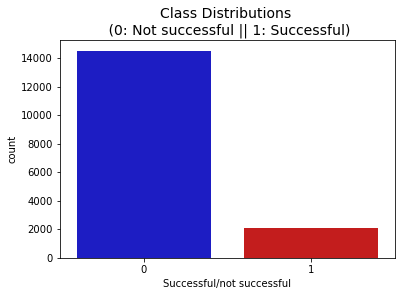

In [8]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(SUCCESS, data=df, palette=colors)
plt.title('Class Distributions \n (0: Not successful || 1: Successful)', fontsize=14)

In [9]:
# defines a new 'mode' function that takes two parameters
def mode(data, column_key):
    mode_counter = Counter()
    for row in data:
        mode_counter[row[column_key]] += 1
    return mode_counter.most_common(1)[0][0]

# example on how to use the 'mode' function
print("Year mode:", mode(data, YEAR))
print("Platform mode:", mode(data, PLATFORM))
print("Genre mode:", mode(data, GENRE))
print("Publisher mode:", mode(data, PUBLISHER))
print("Successful/unsuccessful:",mode(data,SUCCESS))


Year mode: 2007
Platform mode: DS
Genre mode: Action
Publisher mode: Electronic Arts
Successful/unsuccessful: 0


In [10]:

DEFAULT_VALUE = np.nan


def clean(data, column_key, convert_function, default_value):
    for row in data:
        old_value = row[column_key]
        new_value = default_value
        try:
           
                new_value = convert_function(old_value)
        except (ValueError, TypeError):
            print('Replacing {} with {} in column {}'.format(row[column_key], new_value, column_key))
        row[column_key] = new_value

clean(data,SUCCESS,int,DEFAULT_VALUE)
clean(data, YEAR,  int, DEFAULT_VALUE)
clean(data, RANK,  int, DEFAULT_VALUE)

In [11]:
rank1=[]
year1=[]
success1=[]
for row in data:
    rank1.append(row[RANK])
    year1.append(row[YEAR])
    success1.append(row[SUCCESS])
    

In [12]:
#Statistics with numpy

for column_key in [YEAR]:
    v = [row[column_key] for row in data] # grab values
    print(column_key.upper())
    print("* Min..Max: {}..{}".format(np.nanmin(v), np.nanmax(v)))
    print("* Range: {}".format(np.nanmax(v)-np.nanmin(v)))
    print("* Mean: {}".format(np.nanmean(v)))
    print("* Standard deviation: {}".format(np.nanstd(v)))
    print("* Median: {}".format(np.nanmedian(v)))
    q1 = np.nanpercentile(v, 25)
    print("* 25th percentile (Q1): {}".format(q1))
    q3 = np.nanpercentile(v, 75)
    print("* 75th percentile (Q3): {}".format(q3))
    iqr = q3-q1
    print("* IQR: {}".format(iqr))
    
    
std_year=np.nanstd([row[YEAR]for row in data])
std_success=np.nanstd([row[SUCCESS]for row in data])

YEAR
* Min..Max: 1980..2020
* Range: 40
* Mean: 2006.416134474033
* Standard deviation: 5.781511928345644
* Median: 2007.0
* 25th percentile (Q1): 2003.0
* 75th percentile (Q3): 2010.0
* IQR: 7.0


In [13]:
def get_histogram(data, column_key, bin_size, minimum, maximum):
    v = [row[column_key] for row in data] # grab values
    num_bins = (maximum-minimum)//bin_size
    return np.histogram(v, bins=num_bins, range=(minimum,maximum))

def print_histogram(freqs, bins, column_key):
    print(column_key.upper())
    for i, freq in enumerate(freqs):
        bin_str = '[{}..{})'.format(int(bins[i]), int(bins[i+1]))
        print(bin_str, ':', freq)
        
prof_freqs, prof_bins = get_histogram(data, YEAR, 5, 1980, 2020)
print_histogram(prof_freqs, prof_bins, YEAR)

YEAR
[1980..1985) : 122
[1985..1990) : 83
[1990..1995) : 281
[1995..2000) : 1488
[2000..2005) : 3198
[2005..2010) : 6281
[2010..2015) : 4183
[2015..2020) : 962


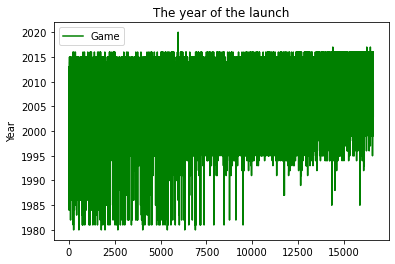

In [14]:
#Visualisation with matplotlib
#Making a frequency polygon


x_values = range(len(data))
year = []
for row in data:
    year.append(row[YEAR])

plt.plot(x_values, year, 'g-', label='Game')
plt.title('The year of the launch')
plt.ylabel('Year')
plt.legend(loc=2)
plt.show()

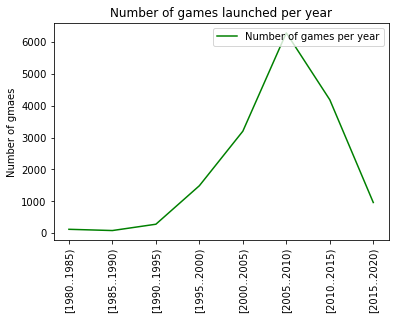

In [15]:
#A real frequency polygon

x_values = range(len(prof_freqs))
x_labels = ['[{}..{})'.format(int(prof_bins[i]), int(prof_bins[i+1])) for i in range(len(prof_freqs))]
plt.plot(x_values, prof_freqs, 'g-', label='Number of games per year')

plt.xticks(x_values, x_labels, rotation='vertical')
plt.title('Number of games launched per year')
plt.ylabel('Number of gmaes')
plt.legend(loc=1)
plt.show()

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


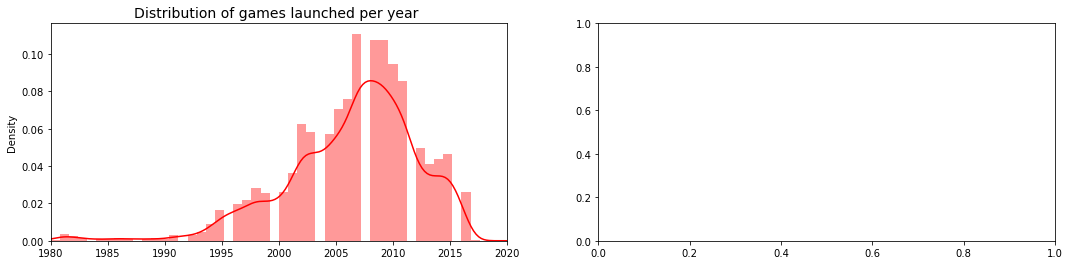

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df[YEAR].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of games launched per year ', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])





plt.show()

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


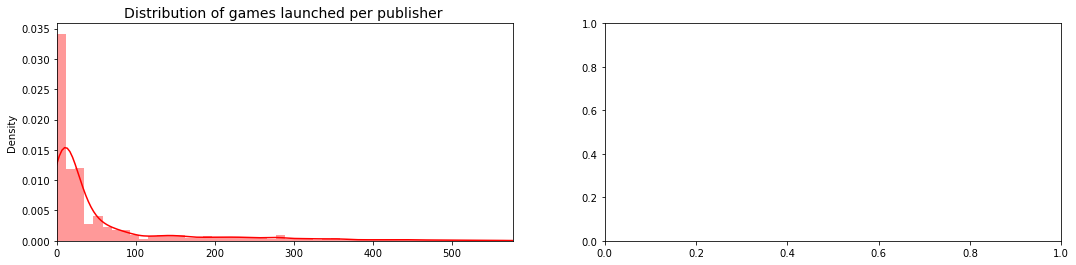

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df[PUBLISHER].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of games launched per publisher ', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])





plt.show()

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


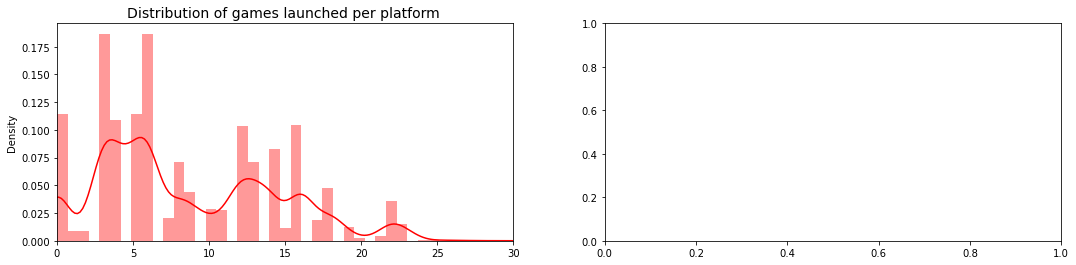

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df[PLATFORM].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of games launched per platform ', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])





plt.show()

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


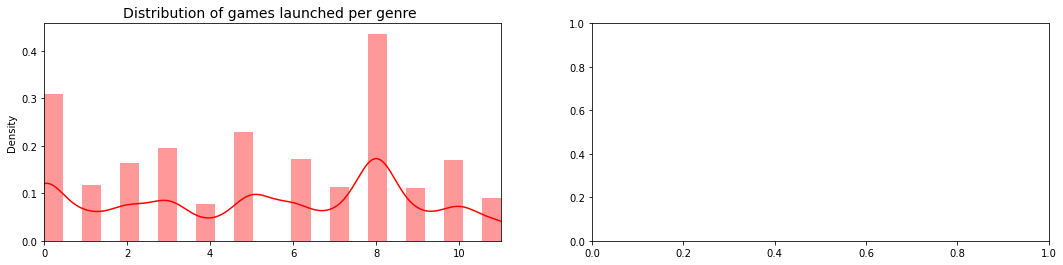

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df[GENRE].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of games launched per genre ', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])





plt.show()

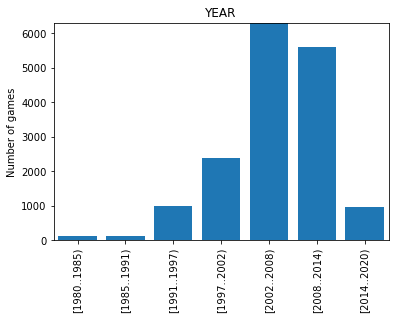

In [20]:
#Making a histogram

def iter_histogram(data, column_key):
    v = [row[column_key] for row in data] # grab values
    freqs, bins = np.histogram(v, bins=7, range=(1980,2020))
    for i, freq in enumerate(freqs):
        yield ('[{}..{})'.format(int(bins[i]), int(bins[i+1])), freq)
        
def make_histogram_plot(data, column_key, title):
    d = OrderedDict(iter_histogram(data, column_key))
    keys = list(d.keys())
    xs = [i+0.5 for i,_ in enumerate(keys)]
    plt.bar(xs, d.values())
    plt.ylabel('Number of games')
    plt.axis([0,7,0,6300])
    plt.title(title)
    plt.xticks([i + 0.5 for i, _ in enumerate(keys)], keys,rotation='vertical')
    plt.show()
    
make_histogram_plot(data,YEAR,'YEAR')


In [21]:
# One-way ANOVA test





 
anova_result = stats.f_oneway(df.loc[: , RANK], df.loc[: , SUCCESS])
print('Can we reject H0?', 'Yes' if anova_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(anova_result.pvalue*100))

Can we reject H0? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)


In [22]:
#Kruskal Wallis test


kw_result = stats.kruskal(df.loc[: , GENRE], df.loc[: , SUCCESS])
print('Can we reject H0?', 'Yes' if kw_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(kw_result.pvalue*100))

Can we reject H0? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)


In [23]:
# Chi-square test
cs_result = stats.chisquare(df.loc[: , NAME], df.loc[: , SUCCESS])
print('Can we reject H0?', 'Yes' if cs_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(cs_result.pvalue*100))

Can we reject H0? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)


C:\Users\denis\anaconda3\lib\site-packages\scipy\stats\stats.py:6125: RuntimeWarning: divide by zero encountered in true_divide
  terms = (f_obs.astype(np.float64) - f_exp)**2 / f_exp


In [24]:
#Mann-Whitney test
mwu_result = stats.mannwhitneyu(df.loc[: , RANK], df.loc[: , PUBLISHER])
print('Can we reject H0?', 'Yes' if mwu_result.pvalue<0.01 else 'No')


print('Is there a reliable difference? Almost certainly..')
print('(There is a {}% chance of falsely obtaining this result)'.format(mwu_result.pvalue*100))

Can we reject H0? Yes
Is there a reliable difference? Almost certainly..
(There is a 0.0% chance of falsely obtaining this result)


In [25]:
#McNemar's test

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    df = 1
    pval = chi2.sf(stat,1)
    return stat, pval

print('\nCan we reject H0?', 'Yes' if mcnemar(df.loc[: , NAME], df.loc[: , SUCCESS])[1]<0.05 else 'No')





Can we reject H0? Yes


In [26]:
#p-hacking

N = 1000
G_mu, G_sigma = 155, 40
L_mu, L_sigma = 150, 40

def run_experiment():
    
    return stats.ttest_ind(df.loc[: , NAME], df.loc[: , SUCCESS]).pvalue*0.5 # one-tailed for testing G_mu > L_mu

# 1 - 
NUM_EXPTS = 10000
pvalues = [run_experiment() for _ in range(NUM_EXPTS)]

# 2 -
ALPHA = 0.05
print('We fail to reject H0 {:.0f}% of the time.'.format(100*sum([1 if p>ALPHA else 0 for p in pvalues])/NUM_EXPTS))

# 3 - You can also run multiple times. The result varies with different samples even though it's generated from the same population!

# 4 - Try increasing N above to 10000.

We fail to reject H0 0% of the time.


In [27]:


print('Not successful', round(df[SUCCESS].value_counts()[0]/len(df) * 100,2), '% of the dataset')
print('Successful', round(df[SUCCESS].value_counts()[1]/len(df) * 100,2), '% of the dataset')

X = df.drop(SUCCESS, axis=1)
y = df[SUCCESS]

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# We already have X_train and y_train for undersample data thats why I am using original to distinguish and to not overwrite these variables.
original_Xtrain, original_Xtest, original_ytrain, original_ytest = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the Distribution of the labels


# Turn into an array
original_Xtrain = original_Xtrain.values
original_Xtest = original_Xtest.values
original_ytrain = original_ytrain.values
original_ytest = original_ytest.values

# See if both the train and test label distribution are similarly distributed
train_unique_label, train_counts_label = np.unique(original_ytrain, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print(train_counts_label/ len(original_ytrain))
print(test_counts_label/ len(original_ytest))

Not successful 87.46 % of the dataset
Successful 12.54 % of the dataset
Train: [  417   418   419 ... 16595 16596 16597] Test: [   0    1    2 ... 4981 4982 4983]
Train: [    0     1     2 ... 16595 16596 16597] Test: [ 417  418  419 ... 7885 7886 7887]
Train: [    0     1     2 ... 16595 16596 16597] Test: [  833   834   835 ... 10789 10790 10791]
Train: [    0     1     2 ... 16595 16596 16597] Test: [ 1249  1250  1251 ... 13692 13693 13694]
Train: [    0     1     2 ... 13692 13693 13694] Test: [ 1665  1666  1667 ... 16595 16596 16597]
----------------------------------------------------------------------------------------------------
Label Distributions: 

[0.87370086 0.12629914]
[0.87831325 0.12168675]


In [28]:
df = df.sample(frac=1)


successful_df = df.loc[df[SUCCESS] == 1]
not_successful_df = df.loc[df[SUCCESS] == 0][:2081]

skew_distributed_df = pd.concat([successful_df, not_successful_df])

# Shuffle dataframe rows
new_df = skew_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,Rank,Name,Platform,Year,Genre,Publisher,Successful/not successful
16030,16033,11089,3,2008,7,358,0
5265,5267,3707,12,1998,8,3,0
2077,2079,846,5,2013,8,32,1
1657,1659,1313,7,1992,1,12,1
6103,6105,3760,4,2012,2,35,0


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Successful/not successful, dtype: float64


C:\Users\denis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


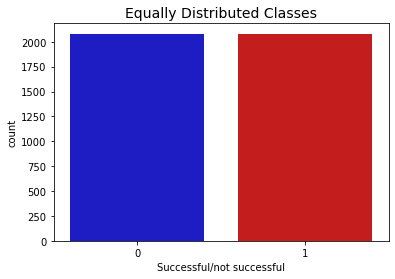

In [29]:
print('Distribution of the Classes in the subsample dataset')
print(new_df[SUCCESS].value_counts()/len(new_df))



sns.countplot(SUCCESS, data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

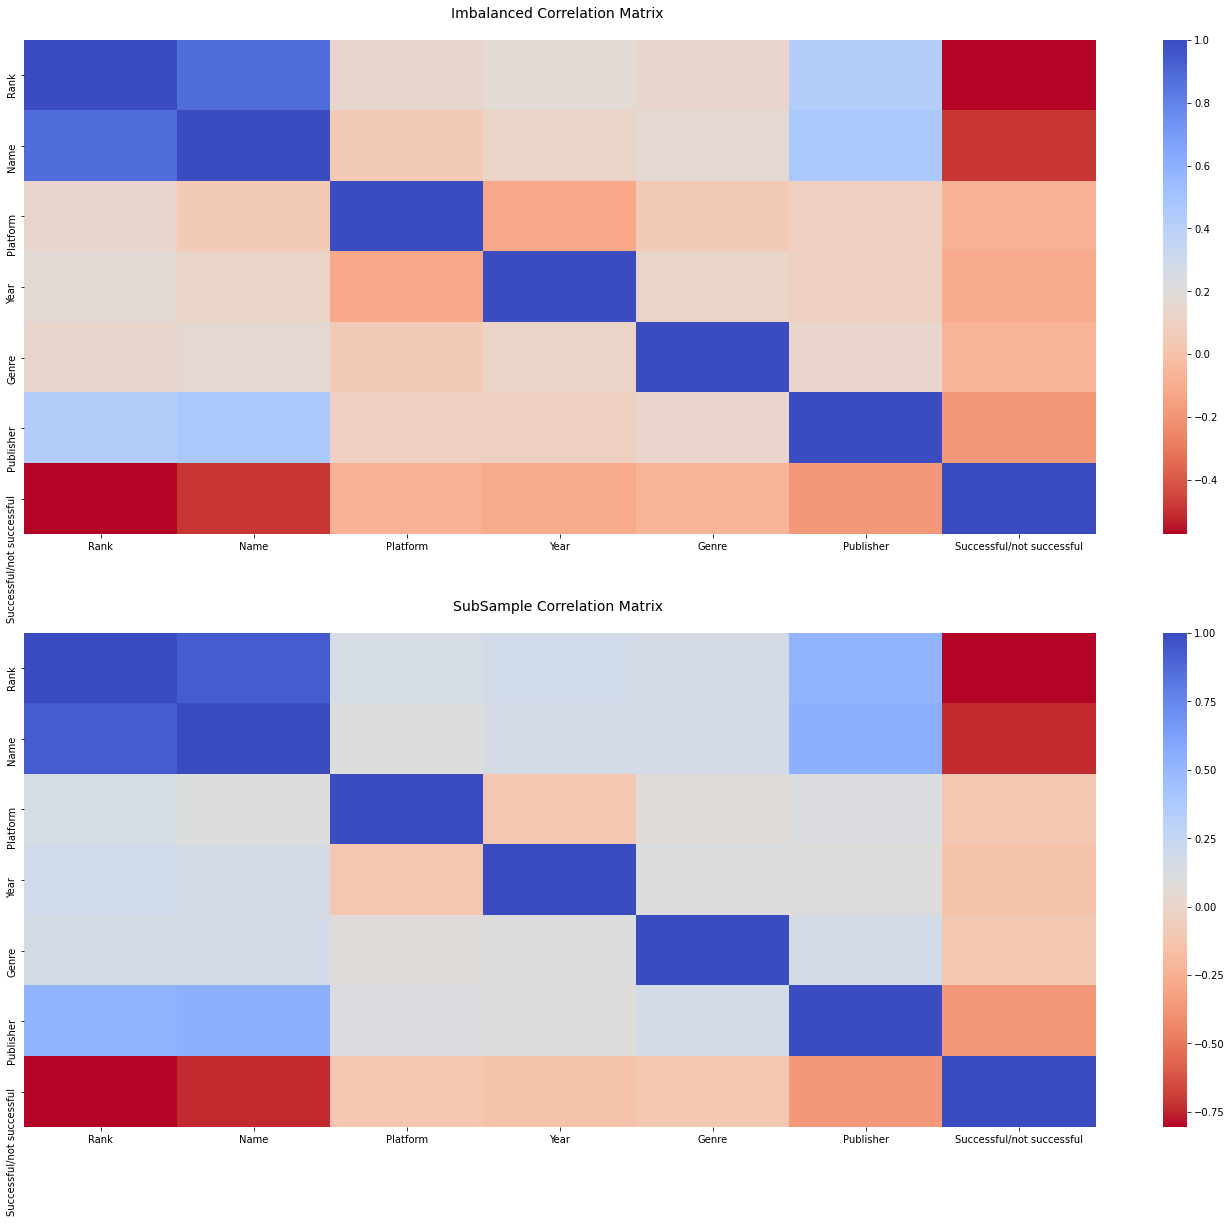

In [30]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix \n ", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SubSample Correlation Matrix \n ', fontsize=14)
plt.show()

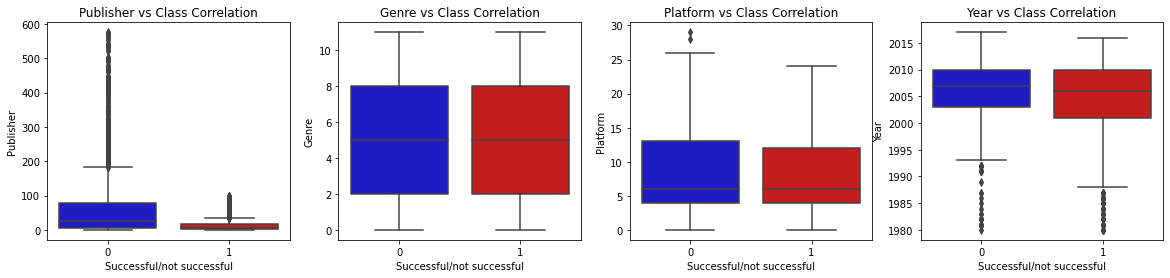

In [31]:



f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x=SUCCESS, y=PUBLISHER, data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Publisher vs Class Correlation')

sns.boxplot(x=SUCCESS, y=GENRE, data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('Genre vs Class Correlation')


sns.boxplot(x=SUCCESS, y=PLATFORM, data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('Platform vs Class Correlation')


sns.boxplot(x=SUCCESS, y=YEAR, data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('Year vs Class Correlation')

plt.show()

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

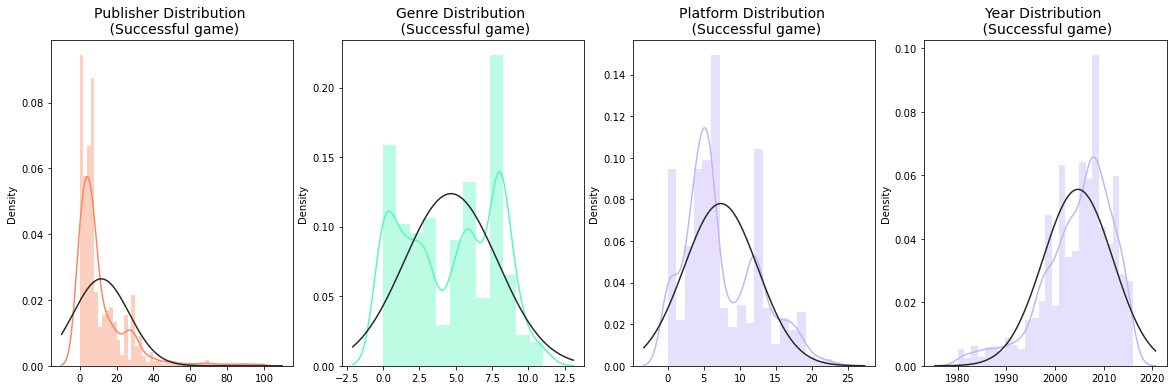

In [32]:




f, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(20, 6))

publisher_success_dist = new_df[PUBLISHER].loc[new_df[SUCCESS] == 1].values
sns.distplot(publisher_success_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Publisher Distribution \n (Successful game)', fontsize=14)

genre_success_dist = new_df[GENRE].loc[new_df[SUCCESS] == 1].values
sns.distplot(genre_success_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Genre Distribution \n (Successful game)', fontsize=14)


platform_success_dist = new_df[PLATFORM].loc[new_df[SUCCESS] == 1].values
sns.distplot(platform_success_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Platform Distribution \n (Successful game)', fontsize=14)


year_success_dist = new_df[YEAR].loc[new_df[SUCCESS] == 1].values
sns.distplot(year_success_dist,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('Year Distribution \n (Successful game)', fontsize=14)

plt.show()

C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\denis\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

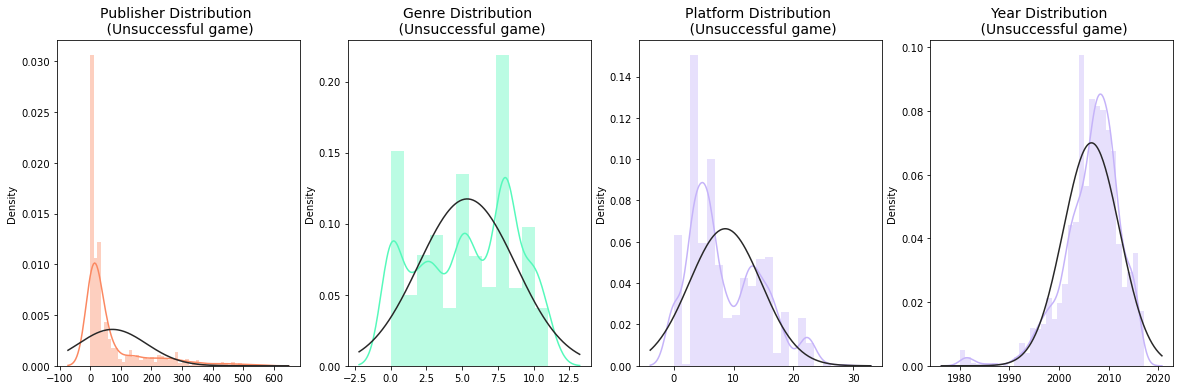

In [33]:


f, (ax1, ax2, ax3,ax4) = plt.subplots(1,4, figsize=(20, 6))

publisher_success_dist = new_df[PUBLISHER].loc[new_df[SUCCESS] == 0].values
sns.distplot(publisher_success_dist,ax=ax1, fit=norm, color='#FB8861')
ax1.set_title('Publisher Distribution \n (Unsuccessful game)', fontsize=14)

genre_success_dist = new_df[GENRE].loc[new_df[SUCCESS] == 0].values
sns.distplot(genre_success_dist,ax=ax2, fit=norm, color='#56F9BB')
ax2.set_title('Genre Distribution \n (Unsuccessful game)', fontsize=14)


platform_success_dist = new_df[PLATFORM].loc[new_df[SUCCESS] == 0].values
sns.distplot(platform_success_dist,ax=ax3, fit=norm, color='#C5B3F9')
ax3.set_title('Platform Distribution \n (Unsuccessful game)', fontsize=14)


year_success_dist = new_df[YEAR].loc[new_df[SUCCESS] == 0].values
sns.distplot(year_success_dist,ax=ax4, fit=norm, color='#C5B3F9')
ax4.set_title('Year Distribution \n (Unsuccessful game)', fontsize=14)

plt.show()

In [34]:




X = new_df.drop(SUCCESS, axis=1)
y = new_df[SUCCESS]



# PCA Implementation
t0 = time.time()
X_reduced_pca = PCA(n_components=2, random_state=42).fit_transform(X.values)
t1 = time.time()
print("PCA took {:.2} s".format(t1 - t0))



PCA took 0.006 s


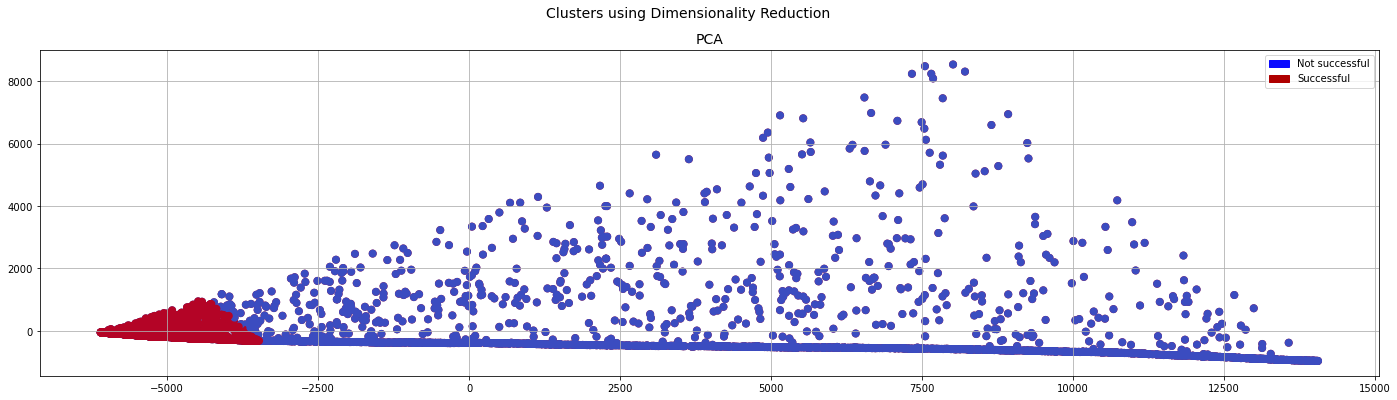

In [35]:



f, (ax1) = plt.subplots(1, 1, figsize=(24,6))
f.suptitle('Clusters using Dimensionality Reduction', fontsize=14)


blue_patch = mpatches.Patch(color='#0A0AFF', label='Not successful')
red_patch = mpatches.Patch(color='#AF0000', label='Successful')




# PCA scatter plot
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 0), cmap='coolwarm', label='Not successful', linewidths=2)
ax1.scatter(X_reduced_pca[:,0], X_reduced_pca[:,1], c=(y == 1), cmap='coolwarm', label='Successful', linewidths=2)
ax1.set_title('PCA', fontsize=14)

ax1.grid(True)

ax1.legend(handles=[blue_patch, red_patch])

plt.show()

In [36]:
X = new_df.drop(SUCCESS, axis=1)
y = new_df[SUCCESS]

In [37]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [39]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    "Support Vector Classifier": SVC(),
    "DecisionTreeClassifier": DecisionTreeClassifier()
}

In [40]:



for key, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    training_score = cross_val_score(classifier, X_train, y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of", round(training_score.mean(), 2) * 100, "% accuracy score")

C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Classifiers:  LogisticRegression Has a training score of 100.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 100.0 % accuracy score
Classifiers:  SVC Has a training score of 99.0 % accuracy score
Classifiers:  DecisionTreeClassifier Has a training score of 100.0 % accuracy score


In [41]:
 #Use GridSearchCV to find the best parameters.




# Logistic Regression 
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}



grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params)
grid_log_reg.fit(X_train, y_train)
# We automatically get the logistic regression with the best parameters.
log_reg = grid_log_reg.best_estimator_

knears_params = {"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

grid_knears = GridSearchCV(KNeighborsClassifier(), knears_params)
grid_knears.fit(X_train, y_train)
# KNears best estimator
knears_neighbors = grid_knears.best_estimator_

# Support Vector Classifier
svc_params = {'C': [0.5, 0.7, 0.9, 1], 'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_train, y_train)

# SVC best estimator
svc = grid_svc.best_estimator_

# DecisionTree Classifier
tree_params = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}
grid_tree = GridSearchCV(DecisionTreeClassifier(), tree_params)
grid_tree.fit(X_train, y_train)

# tree best estimator
tree_clf = grid_tree.best_estimator_

C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [42]:
# Overfitting Case

log_reg_score = cross_val_score(log_reg, X_train, y_train, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')


knears_score = cross_val_score(knears_neighbors, X_train, y_train, cv=5)
print('Knears Neighbors Cross Validation Score', round(knears_score.mean() * 100, 2).astype(str) + '%')

svc_score = cross_val_score(svc, X_train, y_train, cv=5)
print('Support Vector Classifier Cross Validation Score', round(svc_score.mean() * 100, 2).astype(str) + '%')

tree_score = cross_val_score(tree_clf, X_train, y_train, cv=5)
print('DecisionTree Classifier Cross Validation Score', round(tree_score.mean() * 100, 2).astype(str) + '%')

Logistic Regression Cross Validation Score:  99.97%
Knears Neighbors Cross Validation Score 99.85%
Support Vector Classifier Cross Validation Score 99.97%
DecisionTree Classifier Cross Validation Score 99.97%


In [43]:
# We will undersample during cross validating
undersample_X = df.drop(SUCCESS, axis=1)
undersample_y = df[SUCCESS]

for train_index, test_index in sss.split(undersample_X, undersample_y):
    print("Train:", train_index, "Test:", test_index)
    undersample_Xtrain, undersample_Xtest = undersample_X.iloc[train_index], undersample_X.iloc[test_index]
    undersample_ytrain, undersample_ytest = undersample_y.iloc[train_index], undersample_y.iloc[test_index]
    
undersample_Xtrain = undersample_Xtrain.values
undersample_Xtest = undersample_Xtest.values
undersample_ytrain = undersample_ytrain.values
undersample_ytest = undersample_ytest.values 

undersample_accuracy = []
undersample_precision = []
undersample_recall = []
undersample_f1 = []
undersample_auc = []



Train: [ 3211  3215  3216 ... 16595 16596 16597] Test: [   0    1    2 ... 3332 3333 3335]
Train: [    0     1     2 ... 16595 16596 16597] Test: [3211 3215 3216 ... 6670 6672 6673]
Train: [    0     1     2 ... 16595 16596 16597] Test: [ 6362  6373  6381 ... 10013 10014 10015]
Train: [    0     1     2 ... 16595 16596 16597] Test: [ 9511  9522  9528 ... 13287 13288 13289]
Train: [    0     1     2 ... 13287 13288 13289] Test: [13204 13208 13210 ... 16595 16596 16597]


In [44]:
# Let's Plot LogisticRegression Learning Curve


def plot_learning_curve(estimator1, estimator2, estimator3, estimator4, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,14), sharey=True)
    if ylim is not None:
        plt.ylim(*ylim)
    # First Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator1, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax1.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax1.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax1.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax1.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax1.set_title("Logistic Regression Learning Curve", fontsize=14)
    ax1.set_xlabel('Training size (m)')
    ax1.set_ylabel('Score')
    ax1.grid(True)
    ax1.legend(loc="best")
    
    # Second Estimator 
    train_sizes, train_scores, test_scores = learning_curve(
        estimator2, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax2.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax2.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax2.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax2.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax2.set_title("Knears Neighbors Learning Curve", fontsize=14)
    ax2.set_xlabel('Training size (m)')
    ax2.set_ylabel('Score')
    ax2.grid(True)
    ax2.legend(loc="best")
    
    # Third Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator3, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax3.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax3.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax3.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax3.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax3.set_title("Support Vector Classifier \n Learning Curve", fontsize=14)
    ax3.set_xlabel('Training size (m)')
    ax3.set_ylabel('Score')
    ax3.grid(True)
    ax3.legend(loc="best")
    
    # Fourth Estimator
    train_sizes, train_scores, test_scores = learning_curve(
        estimator4, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax4.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="#ff9124")
    ax4.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="#2492ff")
    ax4.plot(train_sizes, train_scores_mean, 'o-', color="#ff9124",
             label="Training score")
    ax4.plot(train_sizes, test_scores_mean, 'o-', color="#2492ff",
             label="Cross-validation score")
    ax4.set_title("Decision Tree Classifier \n Learning Curve", fontsize=14)
    ax4.set_xlabel('Training size (m)')
    ax4.set_ylabel('Score')
    ax4.grid(True)
    ax4.legend(loc="best")
    return plt

<module 'matplotlib.pyplot' from 'C:\\Users\\denis\\anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

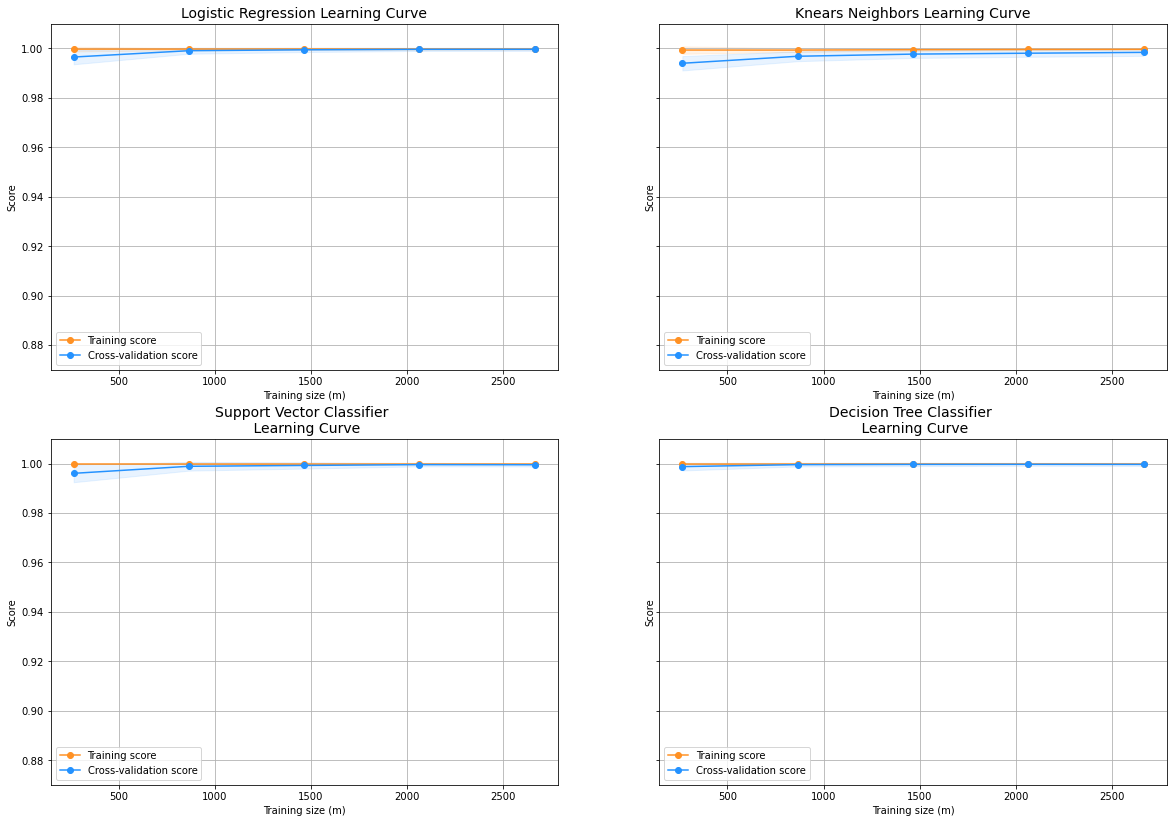

In [45]:
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=42)
plot_learning_curve(log_reg, knears_neighbors, svc, tree_clf, X_train, y_train, (0.87, 1.01), cv=cv, n_jobs=4)

In [46]:





# Create a DataFrame with all the scores and the classifiers names.

log_reg_pred = cross_val_predict(log_reg, X_train, y_train, cv=5,
                             method="decision_function")

knears_pred = cross_val_predict(knears_neighbors, X_train, y_train, cv=5)

svc_pred = cross_val_predict(svc, X_train, y_train, cv=5,
                             method="decision_function")

tree_pred = cross_val_predict(tree_clf, X_train, y_train, cv=5)

In [47]:
from sklearn.metrics import roc_auc_score

print('Logistic Regression: ', roc_auc_score(y_train, log_reg_pred))
print('KNears Neighbors: ', roc_auc_score(y_train, knears_pred))
print('Support Vector Classifier: ', roc_auc_score(y_train, svc_pred))
print('Decision Tree Classifier: ', roc_auc_score(y_train, tree_pred))

Logistic Regression:  0.9999974733145925
KNears Neighbors:  0.9985000512556182
Support Vector Classifier:  1.0
Decision Tree Classifier:  0.9997016706443914


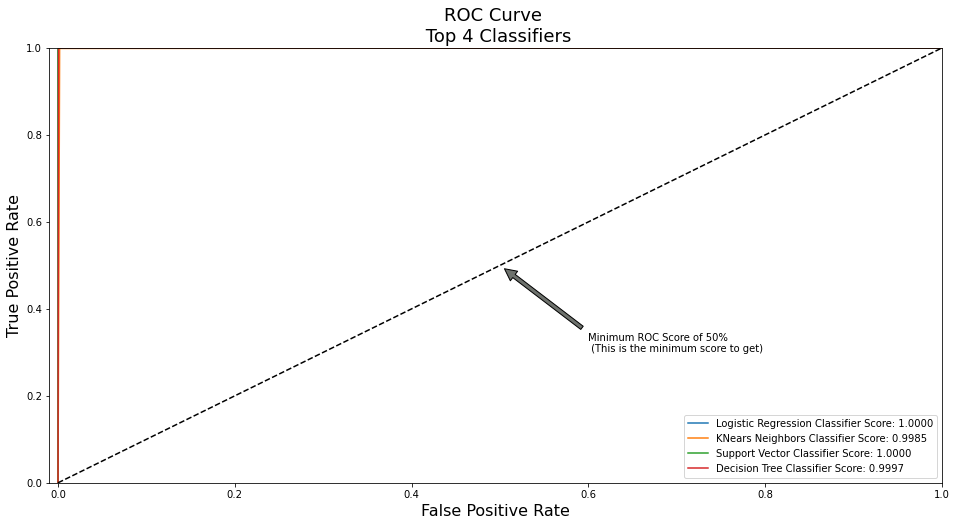

In [48]:
log_fpr, log_tpr, log_thresold = roc_curve(y_train, log_reg_pred)
knear_fpr, knear_tpr, knear_threshold = roc_curve(y_train, knears_pred)
svc_fpr, svc_tpr, svc_threshold = roc_curve(y_train, svc_pred)
tree_fpr, tree_tpr, tree_threshold = roc_curve(y_train, tree_pred)


def graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr):
    plt.figure(figsize=(16,8))
    plt.title('ROC Curve \n Top 4 Classifiers', fontsize=18)
    plt.plot(log_fpr, log_tpr, label='Logistic Regression Classifier Score: {:.4f}'.format(roc_auc_score(y_train, log_reg_pred)))
    plt.plot(knear_fpr, knear_tpr, label='KNears Neighbors Classifier Score: {:.4f}'.format(roc_auc_score(y_train, knears_pred)))
    plt.plot(svc_fpr, svc_tpr, label='Support Vector Classifier Score: {:.4f}'.format(roc_auc_score(y_train, svc_pred)))
    plt.plot(tree_fpr, tree_tpr, label='Decision Tree Classifier Score: {:.4f}'.format(roc_auc_score(y_train, tree_pred)))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.annotate('Minimum ROC Score of 50% \n (This is the minimum score to get)', xy=(0.5, 0.5), xytext=(0.6, 0.3),
                arrowprops=dict(facecolor='#6E726D', shrink=0.05),
                )
    plt.legend()
    
graph_roc_curve_multiple(log_fpr, log_tpr, knear_fpr, knear_tpr, svc_fpr, svc_tpr, tree_fpr, tree_tpr)
plt.show()

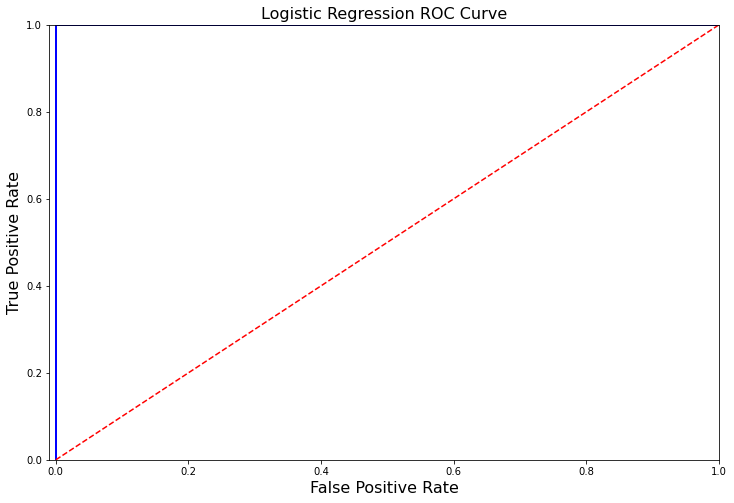

In [49]:
def logistic_roc_curve(log_fpr, log_tpr):
    plt.figure(figsize=(12,8))
    plt.title('Logistic Regression ROC Curve', fontsize=16)
    plt.plot(log_fpr, log_tpr, 'b-', linewidth=2)
    plt.plot([0, 1], [0, 1], 'r--')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.axis([-0.01,1,0,1])
    
    
logistic_roc_curve(log_fpr, log_tpr)
plt.show()

In [50]:
from sklearn.metrics import precision_recall_curve

precision, recall, threshold = precision_recall_curve(y_train, log_reg_pred)

In [51]:



y_pred = log_reg.predict(X_train)

# Overfitting Case
print('---' * 45)
print('Overfitting: \n')
print('Recall Score: {:.2f}'.format(recall_score(y_train, y_pred)))
print('Precision Score: {:.2f}'.format(precision_score(y_train, y_pred)))
print('F1 Score: {:.2f}'.format(f1_score(y_train, y_pred)))
print('Accuracy Score: {:.2f}'.format(accuracy_score(y_train, y_pred)))
print('---' * 45)

# How it should look like
print('---' * 45)
print('How it should be:\n')
print("Accuracy Score: {:.2f}".format(np.mean(undersample_accuracy)))
print("Precision Score: {:.2f}".format(np.mean(undersample_precision)))
print("Recall Score: {:.2f}".format(np.mean(undersample_recall)))
print("F1 Score: {:.2f}".format(np.mean(undersample_f1)))
print('---' * 45)

---------------------------------------------------------------------------------------------------------------------------------------
Overfitting: 

Recall Score: 1.00
Precision Score: 1.00
F1 Score: 1.00
Accuracy Score: 1.00
---------------------------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------------------------
How it should be:

Accuracy Score: nan
Precision Score: nan
Recall Score: nan
F1 Score: nan
---------------------------------------------------------------------------------------------------------------------------------------


C:\Users\denis\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\denis\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [52]:
undersample_y_score = log_reg.decision_function(original_Xtest)

In [53]:
from sklearn.metrics import average_precision_score

undersample_average_precision = average_precision_score(original_ytest, undersample_y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      undersample_average_precision))

Average precision-recall score: 1.00


Text(0.5, 1.0, 'UnderSampling Precision-Recall curve: \n Average Precision-Recall Score =1.00')

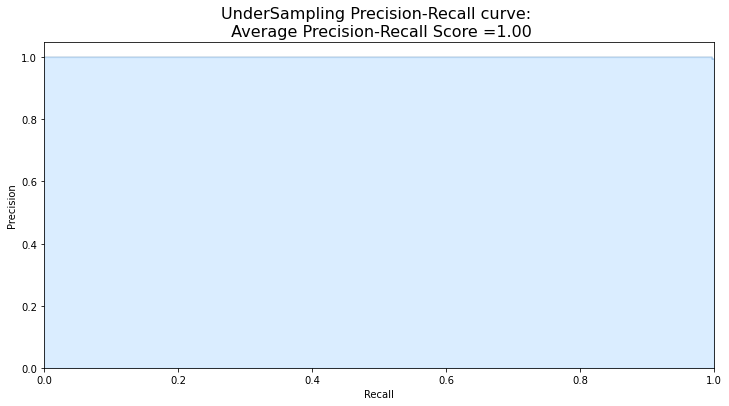

In [54]:


fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, undersample_y_score)

plt.step(recall, precision, color='#004a93', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#48a6ff')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('UnderSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          undersample_average_precision), fontsize=16)

In [55]:



print('Length of X (train): {} | Length of y (train): {}'.format(len(original_Xtrain), len(original_ytrain)))
print('Length of X (test): {} | Length of y (test): {}'.format(len(original_Xtest), len(original_ytest)))

# List to append the score and then find the average
accuracy_lst = []
precision_lst = []
recall_lst = []
f1_lst = []
auc_lst = []

# Classifier with optimal parameters
# log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm = LogisticRegression()




rand_log_reg = RandomizedSearchCV(LogisticRegression(), log_reg_params, n_iter=4)


# Implementing SMOTE Technique 
# Cross Validating the right way
# Parameters
log_reg_params = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
for train, test in sss.split(original_Xtrain, original_ytrain):
    pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_log_reg) # SMOTE happens during Cross Validation not before..
    model = pipeline.fit(original_Xtrain[train], original_ytrain[train])
    best_est = rand_log_reg.best_estimator_
    prediction = best_est.predict(original_Xtrain[test])
    
    accuracy_lst.append(pipeline.score(original_Xtrain[test], original_ytrain[test]))
    precision_lst.append(precision_score(original_ytrain[test], prediction))
    recall_lst.append(recall_score(original_ytrain[test], prediction))
    f1_lst.append(f1_score(original_ytrain[test], prediction))
    auc_lst.append(roc_auc_score(original_ytrain[test], prediction))
    
print('---' * 45)
print('')
print("accuracy: {}".format(np.mean(accuracy_lst)))
print("precision: {}".format(np.mean(precision_lst)))
print("recall: {}".format(np.mean(recall_lst)))
print("f1: {}".format(np.mean(f1_lst)))
print('---' * 45)

Length of X (train): 13278 | Length of y (train): 13278
Length of X (test): 3320 | Length of y (test): 3320


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

---------------------------------------------------------------------------------------------------------------------------------------

accuracy: 0.9996987384566515
precision: 0.9982160519994346
recall: 0.9994047619047619
f1: 0.9988086354003582
---------------------------------------------------------------------------------------------------------------------------------------


In [56]:
labels = ['Not successful', 'Successful']
smote_prediction = best_est.predict(original_Xtest)
print(classification_report(original_ytest, smote_prediction, target_names=labels))

                precision    recall  f1-score   support

Not successful       1.00      1.00      1.00      2916
    Successful       0.98      1.00      0.99       404

      accuracy                           1.00      3320
     macro avg       0.99      1.00      1.00      3320
  weighted avg       1.00      1.00      1.00      3320



In [57]:
y_score = best_est.decision_function(original_Xtest)

In [58]:
average_precision = average_precision_score(original_ytest, y_score)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 1.00


Text(0.5, 1.0, 'OverSampling Precision-Recall curve: \n Average Precision-Recall Score =1.00')

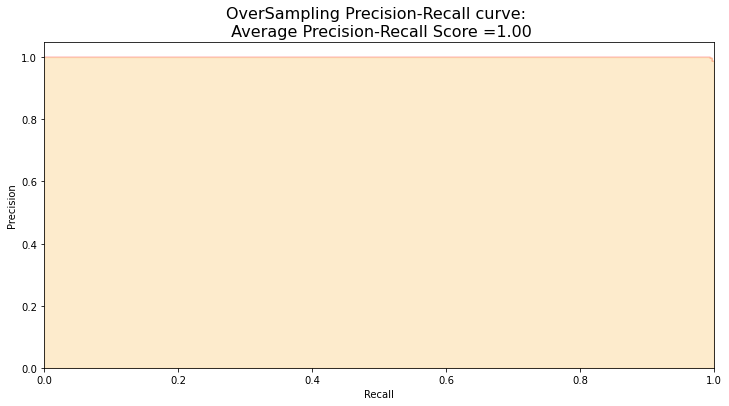

In [59]:
fig = plt.figure(figsize=(12,6))

precision, recall, _ = precision_recall_curve(original_ytest, y_score)

plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='#F59B00')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('OverSampling Precision-Recall curve: \n Average Precision-Recall Score ={0:0.2f}'.format(
          average_precision), fontsize=16)

In [60]:
# SMOTE Technique (OverSampling) After splitting and Cross Validating
sm = SMOTE(random_state=42)
Xsm_train, ysm_train = sm.fit_resample(X_train, y_train)


# This will be the data were we are going to 
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [61]:
# We Improve the score by 2% points approximately 
# Implement GridSearchCV and the other models.

# Logistic Regression
t0 = time.time()
log_reg_sm = grid_log_reg.best_estimator_
log_reg_sm.fit(Xsm_train, ysm_train)
t1 = time.time()
print("Fitting oversample data took :{} sec".format(t1 - t0))

Fitting oversample data took :0.14162015914916992 sec


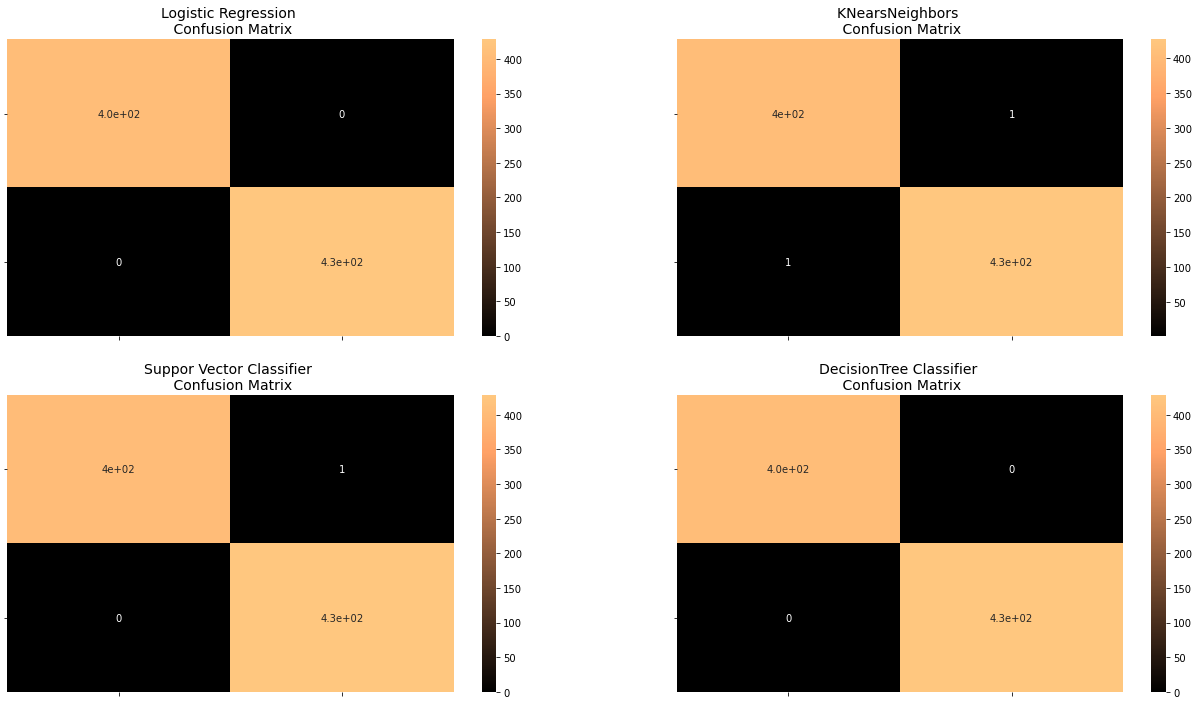

In [62]:

# Logistic Regression fitted using SMOTE technique
y_pred_log_reg = log_reg_sm.predict(X_test)

# Other models fitted with UnderSampling
y_pred_knear = knears_neighbors.predict(X_test)
y_pred_svc = svc.predict(X_test)
y_pred_tree = tree_clf.predict(X_test)


log_reg_cf = confusion_matrix(y_test, y_pred_log_reg)
kneighbors_cf = confusion_matrix(y_test, y_pred_knear)
svc_cf = confusion_matrix(y_test, y_pred_svc)
tree_cf = confusion_matrix(y_test, y_pred_tree)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(svc_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Suppor Vector Classifier \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("DecisionTree Classifier \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)


plt.show()

In [63]:



print('Logistic Regression:')
print(classification_report(y_test, y_pred_log_reg))

print('KNears Neighbors:')
print(classification_report(y_test, y_pred_knear))

print('Support Vector Classifier:')
print(classification_report(y_test, y_pred_svc))

print('Decition Tree Classifier:')
print(classification_report(y_test, y_pred_tree))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       428

    accuracy                           1.00       833
   macro avg       1.00      1.00      1.00       833
weighted avg       1.00      1.00      1.00       833

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       428

    accuracy                           1.00       833
   macro avg       1.00      1.00      1.00       833
weighted avg       1.00      1.00      1.00       833

Support Vector Classifier:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       1.00      1.00      1.00       428

    accuracy                           1.00       833
   macro avg       1.00      1.00      1.00       833
weighted

In [64]:
# Final Score in the test set of logistic regression

# Logistic Regression with Under-Sampling
y_pred = log_reg.predict(X_test)
undersample_score = accuracy_score(y_test, y_pred)



# Logistic Regression with SMOTE Technique (Better accuracy with SMOTE t)
y_pred_sm = best_est.predict(original_Xtest)
oversample_score = accuracy_score(original_ytest, y_pred_sm)


d = {'Technique': ['Random UnderSampling', 'Oversampling (SMOTE)'], 'Score': [undersample_score, oversample_score]}
final_df = pd.DataFrame(data=d)

# Move column
score = final_df['Score']
final_df.drop('Score', axis=1, inplace=True)
final_df.insert(1, 'Score', score)

# Note how high is accuracy score it can be misleading! 
final_df

,Technique,Score
0,Random UnderSampling,1.000000
1,Oversampling (SMOTE),0.997892


In [65]:



df.to_numpy()


# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(df,df.loc[: , SUCCESS], test_size=0.20,
                                                    random_state=5) # so we get the same results


In [66]:


# fitting a model
tree = DecisionTreeClassifier(max_depth=6)
_ = tree.fit(X_train, Y_train)

# Evaluate
print('Classification report:\n')
print(classification_report(Y_test, tree.predict(X_test)))


Classification report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      1.00      1.00       422

    accuracy                           1.00      3320
   macro avg       1.00      1.00      1.00      3320
weighted avg       1.00      1.00      1.00      3320



In [67]:

def get_code(tree, feature_names, target_names, spacer_base="    "):
    """Produce psuedo-code for decision tree.

    Args
    ----
    tree -- scikit-leant DescisionTree.
    feature_names -- list of feature names.
    target_names -- list of target (class) names.
    spacer_base -- used for spacing code (default: "    ").

    Notes
    -----
    based on http://stackoverflow.com/a/30104792.
    """
    left      = tree.tree_.children_left
    right     = tree.tree_.children_right
    threshold = tree.tree_.threshold
    features  = [feature_names[i] for i in tree.tree_.feature]
    value = tree.tree_.value

    def recurse(left, right, threshold, features, node, depth):
        spacer = spacer_base * depth
        if (threshold[node] != -2):
            print(spacer + "if ( " + features[node] + " <= " + \
                  str(threshold[node]) + " ) {")
            if left[node] != -1:
                    recurse(left, right, threshold, features,
                            left[node], depth+1)
            print(spacer + "}\n" + spacer +"else {")
            if right[node] != -1:
                    recurse(left, right, threshold, features,
                            right[node], depth+1)
            print(spacer + "}")
        else:
            target = value[node]
            for i, v in zip(np.nonzero(target)[1],
                            target[np.nonzero(target)]):
                target_name = target_names[i]
                target_count = int(v)
                print(spacer + "return " + str(target_name) + \
                      " ( " + str(target_count) + " examples )")

    recurse(left, right, threshold, features, 0, 0)
    
print('Decision tree:\n')

get_code(tree, list(df.columns), df.loc[: , SUCCESS])

Decision tree:

if ( Successful/not successful <= 0.5 ) {
    return 1 ( 11619 examples )
}
else {
    return 1 ( 1659 examples )
}


In [68]:

# Perform grid search
param_grid = [
    {'max_depth': [2, 3, 4, 5, 6],
     'criterion': ['entropy', 'gini'],
     'splitter': ['best', 'random']}
]
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
scoring = tree.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))
    
#for params, mean_score, scores in tree.cv_results_:
   # print("{:0.3f} (+/-{:0.03f}) for {}".format(
       #     mean_score, scores.std() * 2, params))

# Print best params
print('\nBest parameters:', tree.best_params_)

# Evaluate on held-out test
print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, tree.predict(X_test)))

Grid search mean and stdev:

1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 2, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 3, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 5, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'entropy', 'max_depth': 6, 'splitter': 'random'}
1.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 2, 'splitter': 'best'}
1.000 (+/-0.000) for {'criterion': 'gini', 'max_depth': 2, 'sp

In [69]:
logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
# Calculate whether each test prediction is correct
l_yn = np.array([int(p==t) for p,t in zip(logreg.predict(X_test), Y_test)])
t_yn = np.array([int(p==t) for p,t in zip(tree.predict(X_test), Y_test)])

# There's very little difference in this data set
print(l_yn)
print(t_yn)

# We cannot reject H0. Accuracy is different but not reliably so.
# Therefore, we can select either classifier, e.g.,
# decision tree for interpretability.
print('\nCan we reject H0?', 'Yes' if mcnemar(l_yn, t_yn)[1]<0.05 else 'No')

print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

[1 1 1 ... 1 1 1]
[1 1 1 ... 1 1 1]

Can we reject H0? Yes
Classification report (DecisionTreeClassifier):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2898
           1       1.00      1.00      1.00       422

    accuracy                           1.00      3320
   macro avg       1.00      1.00      1.00      3320
weighted avg       1.00      1.00      1.00      3320



C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
<ipython-input-25-e7f67edbff67>:6: RuntimeWarning: divide by zero encountered in long_scalars
  stat = (np.abs(n1-n2)-1)**2 / (n1+n2)


In [70]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# load digits data
digits = load_digits()
X, y = df.to_numpy(), df.loc[: , SUCCESS]
X_td, X_test, y_td, y_test = train_test_split(df.to_numpy(), df.loc[: , SUCCESS], test_size=0.25,
                                              random_state=5) # so we get the same results
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33,
                                                  random_state=5) # so we get the same results
print()

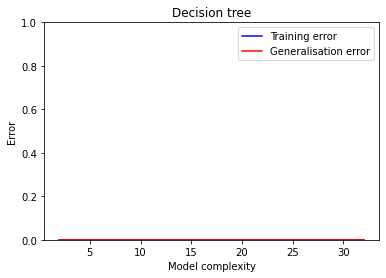

In [71]:
#Plot error vs complexity for decision tree


NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1-accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

complexities = []
train_errors = []
test_errors = []
for max_depth in [2,4,8,16,32,None]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(max_depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Decision tree')
plt.legend()
plt.show()

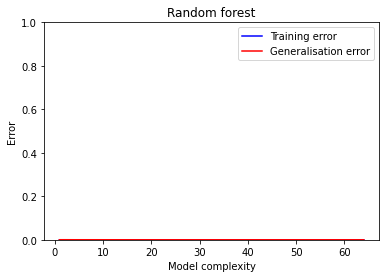

In [72]:
#Assessing decision tree fit

#Plot error vs complexity for random forest


complexities = []
train_errors = []
test_errors = []
for n_estimators in [1,2,4,8,16,32,64]:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=8)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(n_estimators)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,1)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random forest')
plt.legend()
plt.show()

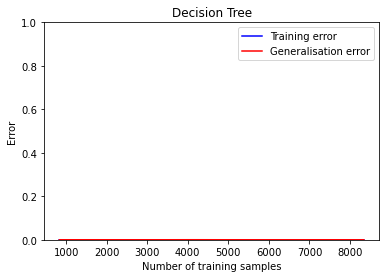

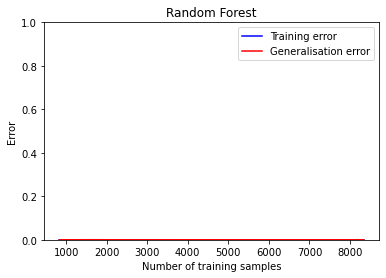

In [73]:
#Plot error vs number of training samples



def plot_error_curves(clf, X_train, y_train, X_test, y_test, num_train_sets=NUM_TRAIN_SETS, title=None):
    data_sizes = []
    train_errors = []
    test_errors = []
    for i in range(num_train_sets):
        sample_size = int(len(y_train) * (i+1)/num_train_sets)
        train_error, test_error = bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size)
        data_sizes.append(sample_size)
        train_errors.append(train_error)
        test_errors.append(test_error)
    plt.plot(data_sizes, train_errors, c='b', label='Training error')
    plt.plot(data_sizes, test_errors, c='r', label='Generalisation error')
    plt.ylim(0,1)
    plt.ylabel('Error')
    plt.xlabel('Number of training samples')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

# Note that we're passing dev data for estimating generalisation error here, not test data
dt = DecisionTreeClassifier(max_depth=8)
plot_error_curves(dt, X_train, y_train, X_dev, y_dev, title='Decision Tree')
rf = RandomForestClassifier(max_depth=8, n_estimators=16)
plot_error_curves(rf, X_train, y_train, X_dev, y_dev, title='Random Forest')

In [74]:


def cols_from_rows(data):
    cols = [[] for _ in data[0]] # init with empty list for each column
    for row in data:
        for i, val in enumerate(row):
            cols[i].append(val)
    return cols

print('Descriptive stats for feature values:')
cols = cols_from_rows(df.to_numpy())
print('-'*75)
print('{:20} {:>10} {:>10} {:>10} {:>10} {:>10}'.format('Name', 'Min', 'Max', 'Mean', 'Stdev', 'Median'))
print('-'*75)
for i, col in enumerate(cols):
    print('{:20} {:10.2f} {:10.2f} {:10.2f} {:10.2f} {:10.2f}'\
          .format(df.loc[: , SUCCESS][i], min(col), max(col), np.mean(col), np.std(col), np.median(col)))
print('-'*75)
    


Descriptive stats for feature values:
---------------------------------------------------------------------------
Name                        Min        Max       Mean      Stdev     Median
---------------------------------------------------------------------------
                   1       1.00   16600.00    8300.61    4791.71    8300.50
                   1       0.00   11492.00    5010.69    3308.11    4678.00
                   1       0.00      30.00       8.61       5.90       6.00
                   1    1980.00    2020.00    2006.42       5.78    2007.00
                   1       0.00      11.00       5.26       3.42       6.00
                   1       0.00     578.00      61.53     101.99      19.00
                   1       0.00       1.00       0.13       0.33       0.00
---------------------------------------------------------------------------


In [75]:
#Logistic regression 

# train and test split
X_train, X_test, Y_train, Y_test = train_test_split(df.to_numpy(), df.loc[: , SUCCESS], test_size=0.33,
                                                    random_state=5) # so we get the same results


logreg = LogisticRegression()
_ = logreg.fit(X_train, Y_train)
print('Intercept:', logreg.intercept_)
print('Coefficients:\n', logreg.coef_)

# We can predict the type of new organisms given measurements
print('\nPredicted type of first five organisms from test split:', logreg.predict(X_test)[:5])
print('Actual type of first five organisms from test split:', Y_test[:5])

Intercept: [0.011418]
Coefficients:
 [[-0.30200631  0.00184651  0.12725025  0.31190821 -0.18953955  0.01025591
   1.50934378]]

Predicted type of first five organisms from test split: [0 0 0 0 0]
Actual type of first five organisms from test split: 8240     0
13565    0
7363     0
8489     0
13037    0
Name: Successful/not successful, dtype: int64


C:\Users\denis\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [76]:
#Evaluating classification


from sklearn.metrics import classification_report
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(df.loc[: , SUCCESS])])
# print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4775
           1       1.00      1.00      1.00       703

    accuracy                           1.00      5478
   macro avg       1.00      1.00      1.00      5478
weighted avg       1.00      1.00      1.00      5478



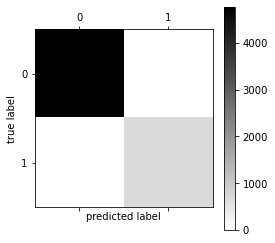

In [77]:

# print('Confusion matrix ({}):\n'.format(key))
_ = plt.matshow(confusion_matrix(Y_test, logreg.predict(X_test)), cmap=plt.cm.binary, interpolation='nearest')
_ = plt.colorbar()
_ = plt.ylabel('true label')
_ = plt.xlabel('predicted label')

In [78]:

warnings.filterwarnings('ignore')

param_grid = [
    {'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)

# print(logreg.cv_results_[{'mean_test_score','std_test_score','params'}])
scoring = logreg.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))


nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 10, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 100, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 1000, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000.0, 'penalty': 'l1'}
0.999 (+/-0.001) for {'C': 10000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100000.0, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 100000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000000.0, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 1000000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000000.0, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 10000000.0, 'penalty': 'l2'}


In [79]:

warnings.filterwarnings('ignore')

# Perform grid search
param_grid = [
    {'C': [1, 10, 100, 1000, 1e4, 1e5, 1e6, 1e7], 'penalty': ['l1', 'l2']}
]
logreg = GridSearchCV(LogisticRegression(), param_grid)
logreg.fit(X_train, Y_train)

# Print grid search results
print('Grid search mean and stdev:\n')
scoring = logreg.cv_results_
for mean_score, std, params in zip(scoring['mean_test_score'],scoring['std_test_score'],scoring['params']):
    print("{:0.3f} (+/-{:0.03f}) for {}".format(
            mean_score, std * 2, params))


# Print best params
print('\nBest parameters:', logreg.best_params_)

# print('\nClassification report ({}):\n'.format(key))
print(classification_report(Y_test, logreg.predict(X_test)))

Grid search mean and stdev:

nan (+/-nan) for {'C': 1, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 1, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 10, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 100, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 1000, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000.0, 'penalty': 'l1'}
0.999 (+/-0.001) for {'C': 10000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 100000.0, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 100000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 1000000.0, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 1000000.0, 'penalty': 'l2'}
nan (+/-nan) for {'C': 10000000.0, 'penalty': 'l1'}
1.000 (+/-0.001) for {'C': 10000000.0, 'penalty': 'l2'}

Best parameters: {'C': 1, 'penalty': 'l2'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4775
           1       1.00   